<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/CryptoFinanceQuant/blob/main/CalculodeBeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#baixar bibliotecas
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.4 MB 6.2 MB/s 
     |████████████████████████████████| 63 kB 22.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
#importar bibliotecas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

In [111]:
symbols = ['SOL-USD','LUNA1-USD','BNB-USD','LTC-USD','XMR-USD','AAVE-USD']

In [112]:
portfolio = web.get_data_yahoo(symbols, period='1y')['Close']

[*********************100%***********************]  6 of 6 completed


In [113]:
portfolio = portfolio.rename(columns={'SOL-USD':'Solana','LUNA1-USD':'Luna','BNB-USD':'BNB','LTC-USD':'Litecoin','XMR-USD':'Monero','AAVE-USD':'AAVE'})

In [114]:
portfolio

,AAVE,BNB,Litecoin,Luna,Solana,Monero
Date,,,,,,
2021-05-05,480.030792,651.662720,356.037079,17.017754,44.923576,417.208862
2021-05-06,452.408752,633.280396,353.510345,16.768295,43.455677,422.517395
2021-05-07,445.222382,624.563293,346.253571,16.582764,43.155018,457.144989
2021-05-08,466.317566,646.100830,346.368744,16.984989,45.561531,475.472778
2021-05-09,459.587219,662.228577,386.450775,16.993803,44.330196,483.583618
...,...,...,...,...,...,...
2022-04-30,142.740860,377.767822,96.165985,78.344093,85.095932,214.662567
2022-05-01,146.555435,390.281982,99.435776,82.239548,89.671509,212.669113
2022-05-02,144.047058,389.670654,100.693230,84.309166,87.581017,198.667160


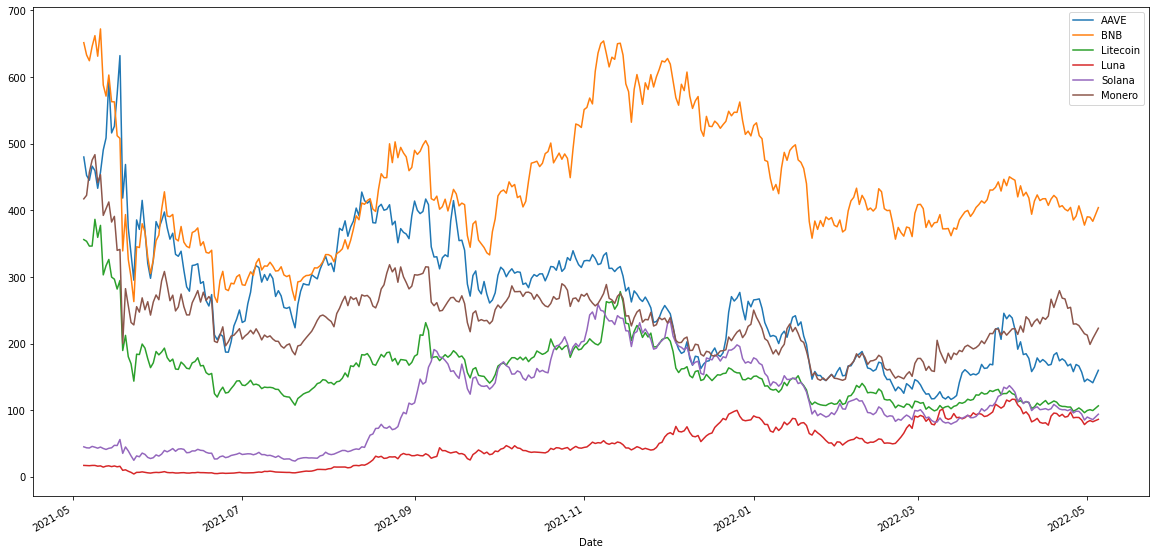

In [115]:
portfolio.plot(figsize=(20,10))

In [118]:
#retorno do porfolio
retornos = portfolio.pct_change().dropna()

In [119]:
retornos

,AAVE,BNB,Litecoin,Luna,Solana,Monero
Date,,,,,,
2021-05-06,-0.057542,-0.028208,-0.007097,-0.014659,-0.032675,0.012724
2021-05-07,-0.015885,-0.013765,-0.020528,-0.011064,-0.006919,0.081955
2021-05-08,0.047381,0.034484,0.000333,0.024256,0.055764,0.040092
2021-05-09,-0.014433,0.024962,0.115721,0.000519,-0.027026,0.017058
2021-05-10,-0.057734,-0.046625,-0.070181,-0.066196,-0.032045,-0.086740
...,...,...,...,...,...,...
2022-04-30,-0.091489,-0.038911,-0.041962,-0.079564,-0.094833,-0.027303
2022-05-01,0.026724,0.033127,0.034002,0.049722,0.053770,-0.009286
2022-05-02,-0.017116,-0.001566,0.012646,0.025166,-0.023313,-0.065839


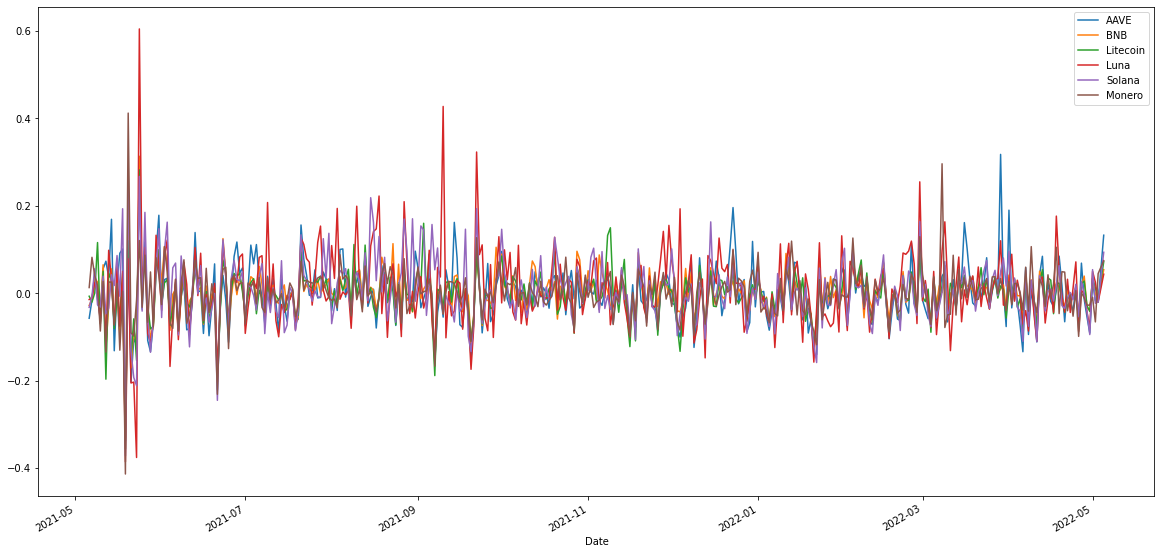

In [120]:
retornos.plot(figsize=(20,10))

In [121]:
#correlações determinar os Betas
retornos.corr()

,AAVE,BNB,Litecoin,Luna,Solana,Monero
AAVE,1.000000,0.730509,0.721150,0.544277,0.644620,0.604514
BNB,0.730509,1.000000,0.838351,0.634765,0.695616,0.716687
Litecoin,0.721150,0.838351,1.000000,0.592688,0.662626,0.713687
Luna,0.544277,0.634765,0.592688,1.000000,0.621244,0.481063
Solana,0.644620,0.695616,0.662626,0.621244,1.000000,0.587313
Monero,0.604514,0.716687,0.713687,0.481063,0.587313,1.000000


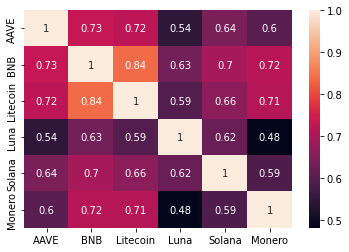

In [123]:
sns.heatmap(retornos.corr(), annot=True)

In [126]:
#Calculo do Beta da Carteira

Betas = retornos.cov()/retornos['BNB'].var()
Betas

,AAVE,BNB,Litecoin,Luna,Solana,Monero
AAVE,1.799839,0.980036,1.028828,1.262484,1.195000,0.933778
BNB,0.980036,1.000000,0.891511,1.097494,0.961207,0.825183
Litecoin,1.028828,0.891511,1.130839,1.089723,0.973681,0.873834
Luna,1.262484,1.097494,1.089723,2.989362,1.484222,0.957660
Solana,1.195000,0.961207,0.973681,1.484222,1.909392,0.934410
Monero,0.933778,0.825183,0.873834,0.957660,0.934410,1.325686
